<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W1221 14:46:23.254867 140224599622464 module_wrapper.py:139] From /tmp/ipykernel_1353461/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W1221 14:46:23.256094 140224599622464 module_wrapper.py:139] From /tmp/ipykernel_1353461/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
data_path = "/home/ajita/Documents/data_integration/Pan/Pancreas.h5ad"
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_atlas_public.h5ad"
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_NA_0.1.h5ad" #0.2.

In [9]:
name = "Pancreas"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                } 

W1221 14:46:23.913483 140224599622464 module_wrapper.py:139] From /tmp/ipykernel_1353461/2271724977.py:11: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1221 14:46:23.914924 140224599622464 module_wrapper.py:139] From /tmp/ipykernel_1353461/2271724977.py:16: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2022-12-21 14:46:23.916631: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-12-21 14:46:23.946676: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2022-12-21 14:46:23.956421: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560823dded80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-12-21 14:46:23.956444: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-

came in load_gene
updated hvg
updated hvg


W1221 14:47:05.455178 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1221 14:47:05.462868 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:276: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1221 14:47:05.463928 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W1221 14:47:05.464417 140224599622464 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflo

Shape self.data_train: (15327, 2000)
Shape self.data_test: (16382, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2009), dtype=float32)


W1221 14:47:05.681787 140224599622464 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:305: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1221 14:47:05.768143 140224599622464 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:42: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1221 14:47:05.769760 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:564: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1221 14:47:05.911163 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAM

decoder input shape  Tensor("concat_2:0", shape=(?, 19), dtype=float32)
KL gaussian z Tensor("mul_9:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_8:0", shape=(?,), dtype=float32)


W1221 14:47:05.986818 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:115: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.

W1221 14:47:05.987676 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:124: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W1221 14:47:06.012746 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:131: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1221 14:47:06.033614 140224599622464 deprecation.py:323] From /home/ajita/anaconda3/envs/tf1_dra/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updatin

Cluster DRA on DataSet /home/ajita/Documents/data_integration/Pan/Pancreas.h5ad ... 


W1221 14:47:07.397210 140224599622464 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model.py:143: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 481.7008, d_loss: -0.0084
Epoch : [1] ,  a_loss = 577.1624, d_loss: -0.0055
Epoch : [2] ,  a_loss = 641.8969, d_loss: -0.0042
Epoch : [3] ,  a_loss = 413.7782, d_loss: -0.0224
Epoch : [4] ,  a_loss = 514.6329, d_loss: -0.0033
Epoch : [5] ,  a_loss = 623.6713, d_loss: -0.0031
Epoch : [6] ,  a_loss = 618.9293, d_loss: -0.0039
Epoch : [7] ,  a_loss = 478.3698, d_loss: -0.0037
Epoch : [8] ,  a_loss = 371.1548, d_loss: -0.0054
Epoch : [9] ,  a_loss = 382.5834, d_loss: -0.0056
Epoch : [10] ,  a_loss = 388.6056, d_loss: -0.0050
Epoch : [11] ,  a_loss = 421.5706, d_loss: -0.0043
Epoch : [12] ,  a_loss = 690.3032, d_loss: -0.0030
Epoch : [13] ,  a_loss = 645.2428, d_loss: -0.0036
Epoch : [14] ,  a_loss = 660.3566, d_loss: -0.0040
Epoch : [15] ,  a_loss = 575.1092, d_loss: -0.0042
Epoch : [16] ,  a_loss = 407.3631, d_loss: -0.0394
Epoch : [17] ,  a_loss = 558.0925, d_loss: -0.0979
Epoch : [18] ,  a_loss = 373.9187, d_loss: -0.0122
Epoch : [19] ,  a_loss = 441.0851, d_loss

Epoch : [160] ,  a_loss = 414.3936, d_loss: -0.1126
Epoch : [161] ,  a_loss = 489.0159, d_loss: -0.1102
Epoch : [162] ,  a_loss = 562.4930, d_loss: -0.1333
Epoch : [163] ,  a_loss = 351.0718, d_loss: -0.1148
Epoch : [164] ,  a_loss = 316.6335, d_loss: -0.0993
Epoch : [165] ,  a_loss = 525.8924, d_loss: -0.1047
Epoch : [166] ,  a_loss = 499.4430, d_loss: -0.1601
Epoch : [167] ,  a_loss = 470.6649, d_loss: -0.2629
Epoch : [168] ,  a_loss = 336.7252, d_loss: -0.1777
Epoch : [169] ,  a_loss = 336.2054, d_loss: -0.2200
Epoch : [170] ,  a_loss = 529.3183, d_loss: -0.2430
Epoch : [171] ,  a_loss = 550.1199, d_loss: -0.3213
Epoch : [172] ,  a_loss = 346.9055, d_loss: -0.0123
Epoch : [173] ,  a_loss = 281.4243, d_loss: -0.0938
Epoch : [174] ,  a_loss = 284.6335, d_loss: 0.0424
Epoch : [175] ,  a_loss = 399.8820, d_loss: 0.2935
Epoch : [176] ,  a_loss = 466.6364, d_loss: -0.2391
Epoch : [177] ,  a_loss = 466.4239, d_loss: -0.2538
Epoch : [178] ,  a_loss = 502.5122, d_loss: -0.1914
Epoch : [179] 

Epoch : [318] ,  a_loss = 430.3332, d_loss: -0.3333
Epoch : [319] ,  a_loss = 430.2498, d_loss: -0.3387
Epoch : [320] ,  a_loss = 430.1561, d_loss: -0.3181
Epoch : [321] ,  a_loss = 430.0758, d_loss: -0.3333
Epoch : [322] ,  a_loss = 430.1331, d_loss: -0.3221
Epoch : [323] ,  a_loss = 429.9081, d_loss: -0.3190
Epoch : [324] ,  a_loss = 429.9970, d_loss: -0.3183
Epoch : [325] ,  a_loss = 429.8597, d_loss: -0.3243
Epoch : [326] ,  a_loss = 429.9615, d_loss: -0.3292
Epoch : [327] ,  a_loss = 429.7814, d_loss: -0.3223
Epoch : [328] ,  a_loss = 429.7198, d_loss: -0.3362
Epoch : [329] ,  a_loss = 429.8062, d_loss: -0.3477
Epoch : [330] ,  a_loss = 429.5793, d_loss: -0.3103
Epoch : [331] ,  a_loss = 429.5800, d_loss: -0.3298
Epoch : [332] ,  a_loss = 429.4971, d_loss: -0.3292
Epoch : [333] ,  a_loss = 429.3771, d_loss: -0.3319
Epoch : [334] ,  a_loss = 429.3497, d_loss: -0.3426
Epoch : [335] ,  a_loss = 429.2738, d_loss: -0.3327
Epoch : [336] ,  a_loss = 429.2429, d_loss: -0.3514
Epoch : [337

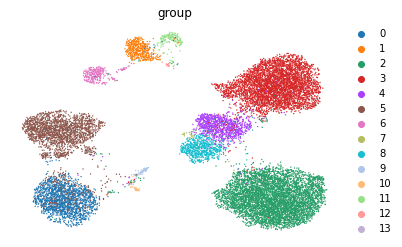

None


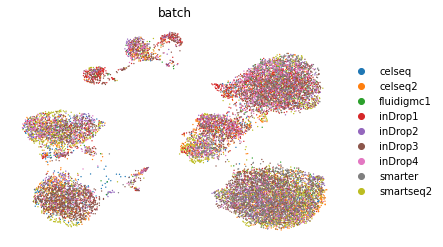

None
Computing NMI ...
Done !
NMI = 0.7161297002875004


'\nwith tf.Session(config = run_config) as sess:\n\n    dreamer = model.scDREAMER(\n        sess,\n        epoch = 300,\n        dataset_name = data_path,\n        batch = batch_key_dic[name],\n        cell_type = cell_type_key_dic[name],\n        name = name\n        )\n\n    dreamer.train_cluster()\n    \n    print("scDREAMER annotations training:")\n    dreamer1 = model1.scDREAMER1(\n        sess,\n        epoch = 50,\n        dataset_name = data_path,\n        batch = batch_key_dic[name],\n        cell_type = cell_type_key_dic[name],\n        name = name\n    )\n\n    dreamer1.train_cluster()\n    \n'

In [10]:
import model # working smooth - need to check if it is the raw version..???
#import model_wo_Dis as model# without Discriminator : working fine
#import model_wo_BC as model # without Batch Classiifer: working fine
#import model_ED as model # working properly with utils_new

#import model_scanvi_split_training as model1 # new model scDREAMER++ with utils
# import model_scanvi as model # scanvi setting

#import model_scanvi_semisupervised as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 400,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()
    
"""
with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()
    
    print("scDREAMER annotations training:")
    dreamer1 = model1.scDREAMER1(
        sess,
        epoch = 50,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
    )

    dreamer1.train_cluster()
    
"""
